# reliability.space
# simplified reliability prediction
# Bearing:     solid lubricant wear model

by Matthias Schubert, Matrisk GmbH, 2021-09-16

For ESA RFP 17225

## General model

Solid lubricant wear modelling is described taking example in a ball bearing. The modelling is applicable to other cases of solid lubricant wear, however, the number of revolution has to be substituted with another measure of sliding distance. 
For solid lubricant reservoir wear (e.g. cage of a ball bearing), the limit state function for the adhesive wear model is formulated as follows:

$g\left( {\bf{X}} \right) = {V_{{\rm{limit}}}} - \Theta  \cdot \sum\limits_{i = 1}^{{n_p}} {{K_{H,i}} \cdot {\alpha _i} \cdot re{v_i}}$

Where $\alpha$ denotes the average work of ball/cage interaction forces per revolution and $rev_i$ the number of revolutions in time interval $i$ . The parameter $\alpha$ will typically be estimated from tests and is, thus dependent on the wear rate $K_H$ , which is used to estimate $\alpha$ from the test results. Therefore, $K_H$ cannot be easily taken out of the sum.

In [1]:
#   IMPORTs
from IPython.display import display 
import ipywidgets as widgets 
from ipywidgets import interact, Layout
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import nbinteract as nbi
from IPython.display import HTML

## Input values for reliability prediction

#### Limiting value (worn volume), $V_{lim}$ $[m^3]$

In [2]:
E_vlimit = widgets.Text(value='6.5e-8', description='$E[V_{lim}]:$');display(E_vlimit);
nu_vlimit = widgets.Text(value='0.2', description='$CoV[V_{lim}]:$');display(nu_vlimit);
dt_vlimit = widgets.Dropdown(options=['N', 'LN', 'G'], value='LN', description='Dist.-Type: ');display(dt_vlimit); 

Text(value='6.5e-8', description='$E[V_{lim}]:$')

Text(value='0.2', description='$CoV[V_{lim}]:$')

Dropdown(description='Dist.-Type: ', index=1, options=('N', 'LN', 'G'), value='LN')

### Specific wear rate, $K_H$ $[Pa^{-1}=m^2/N]$


Mean value and Coefficient of Variation

In [3]:
E_KH = widgets.Text(value='4e-15', description='$E[K_{H}]:$');display(E_KH);
nu_KH = widgets.Text(value='0.66', description='$CoV[K_{H}]:$');display(nu_KH);
dt_KH = widgets.Dropdown(options=['N', 'LN', 'G'], value='LN', description='Dist.-Type: ');display(dt_KH);

Text(value='4e-15', description='$E[K_{H}]:$')

Text(value='0.66', description='$CoV[K_{H}]:$')

Dropdown(description='Dist.-Type: ', index=1, options=('N', 'LN', 'G'), value='LN')

### Ball-cage interaction, $\alpha$ $[N/m]$


In [4]:
E_alpha = widgets.Text(value='0.018', description='$E[\\alpha]:$');display(E_alpha);
nu_alpha = widgets.Text(value='0.2', description='$CoV[\\alpha]:$');display(nu_alpha);
dt_alpha = widgets.Dropdown(options=['N', 'LN', 'G'], value='LN', description='Dist.-Type: ');display(dt_alpha);

Text(value='0.018', description='$E[\\alpha]:$')

Text(value='0.2', description='$CoV[\\alpha]:$')

Dropdown(description='Dist.-Type: ', index=1, options=('N', 'LN', 'G'), value='LN')

### Model uncertainty, $\Theta$ $[-]$

In [5]:
E_theta = widgets.Text(value='1.2', description='$E[\\Theta]:$');display(E_theta);
nu_theta = widgets.Text(value='0.2', description='$CoV[\\Theta]:$');display(nu_theta);
dt_theta = widgets.Dropdown(options=['N', 'LN', 'G'], value='LN', description='Dist.-Type: ');display(dt_theta);

Text(value='1.2', description='$E[\\Theta]:$')

Text(value='0.2', description='$CoV[\\Theta]:$')

Dropdown(description='Dist.-Type: ', index=1, options=('N', 'LN', 'G'), value='LN')

### Nominal number of revolutions, $rev$ $[ \# ]$

In [6]:
rev = widgets.Text(value='245e+6', description='$rev$');display(rev);

Text(value='245e+6', description='$rev$')

In [7]:
#   text to float
E_vlimit_val = float(E_vlimit.value)
nu_vlimit_val = float(nu_vlimit.value)
E_KH_val = float(E_KH.value)
nu_KH_val = float(nu_KH.value)
E_alpha_val = float(E_alpha.value)
nu_alpha_val = float(nu_alpha.value)
E_theta_val = float(E_theta.value)
nu_theta_val = float(nu_theta.value)
rev_val = float(rev.value)


rev_min=rev_val*0.5;  #for plotting
rev_max=rev_val*1.5;  #for plotting


In [8]:

#revolutions per hour
rev_hour=6;
######################################################

# Transfer parameters
E_x1 = E_vlimit_val;
nu_x1 = nu_vlimit_val;
nu_KH_alpha = E_KH_val*nu_KH_val * E_alpha_val*nu_alpha_val;
var_KH = (E_KH_val*nu_KH_val)**2;
var_alpha = (E_alpha_val*nu_alpha_val)**2;
var_KH_alpha = var_KH*var_alpha + var_KH*E_alpha_val**2 + var_alpha*E_KH_val**2;
E_x2 = (E_KH_val*E_alpha_val + nu_KH_alpha)*rev_val;
nu_x2 = 1/E_x2*rev_val*np.sqrt(var_KH_alpha);

In [9]:
#Analytical approximation simplified model
pf = norm.cdf((np.log(E_theta_val) - np.log(E_x1/E_x2) + 0.5*(np.log(nu_x1**2 + 1) - np.log(nu_x2**2 + 1) - np.log(nu_theta_val**2 + 1))) / np.sqrt(np.log( nu_theta_val**2 + 1 ) + 
np.log( nu_x1**2 + 1 ) + np.log( nu_x2**2 + 1 )));
rev_mat=np.linspace(rev_min,rev_max,50);



In [10]:
pf_mat=[]
for i_rev in range(rev_mat.shape[0]):
        E_x2 = (E_KH_val*E_alpha_val + nu_KH_alpha)*rev_mat[i_rev];
        nu_x2 = 1/E_x2*rev_mat[i_rev]*np.sqrt(var_KH_alpha);
    
        pf_mat.append( norm.cdf((np.log(E_theta_val) - np.log(E_x1/E_x2) + 0.5*(np.log(nu_x1**2 + 1) -  np.log(nu_x2**2 + 1) - np.log(nu_theta_val**2 + 1))) / np.sqrt(np.log( nu_theta_val**2 + 1 ) + np.log( nu_x1**2 + 1 ) + np.log( nu_x2**2 + 1 ))) )


### Result - Probability of failure as a function of the numer of revolutions in the bearing

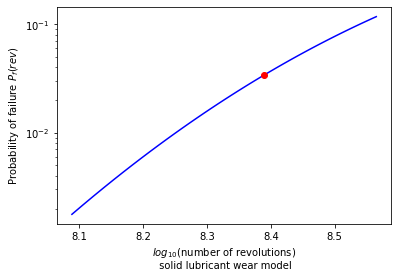

In [11]:
%matplotlib inline
plt.plot(np.log10(rev_mat), pf_mat,'b-')
plt.plot(np.log10(rev_val), pf,'ro')
plt.xlabel('$log_{10}$(number of revolutions)\n solid lubricant wear model')
plt.ylabel('Probability of failure $P_f(rev)$')
plt.yscale('log')


In [12]:
pf_txt = widgets.Text(value=str(pf), description='$P_f=$');display(pf_txt);

Text(value='0.03391272089227932', description='$P_f=$')